In [1]:
'''
Code copied from this source as recommended by Ebay official since current version of scikit-learn does not have pair confusion matrix
https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/cluster/_supervised.py
'''
import numpy as np
from sklearn.metrics.cluster._supervised import contingency_matrix, check_clusterings
def pair_confusion_matrix(labels_true, labels_pred):
    """Pair confusion matrix arising from two clusterings.
    The pair confusion matrix :math:`C` computes a 2 by 2 similarity matrix
    between two clusterings by considering all pairs of samples and counting
    pairs that are assigned into the same or into different clusters under
    the true and predicted clusterings.
    Considering a pair of samples that is clustered together a positive pair,
    then as in binary classification the count of true negatives is
    :math:`C_{00}`, false negatives is :math:`C_{10}`, true positives is
    :math:`C_{11}` and false positives is :math:`C_{01}`.
    Read more in the :ref:`User Guide <pair_confusion_matrix>`.
    Parameters
    ----------
    labels_true : array-like of shape (n_samples,), dtype=integral
        Ground truth class labels to be used as a reference.
    labels_pred : array-like of shape (n_samples,), dtype=integral
        Cluster labels to evaluate.
    Returns
    -------
    C : ndarray of shape (2, 2), dtype=np.int64
        The contingency matrix.
    See Also
    --------
    rand_score: Rand Score
    adjusted_rand_score: Adjusted Rand Score
    adjusted_mutual_info_score: Adjusted Mutual Information
    Examples
    --------
    Perfectly matching labelings have all non-zero entries on the
    diagonal regardless of actual label values:
      >>> from sklearn.metrics.cluster import pair_confusion_matrix
      >>> pair_confusion_matrix([0, 0, 1, 1], [1, 1, 0, 0])
      array([[8, 0],
             [0, 4]]...
    Labelings that assign all classes members to the same clusters
    are complete but may be not always pure, hence penalized, and
    have some off-diagonal non-zero entries:
      >>> pair_confusion_matrix([0, 0, 1, 2], [0, 0, 1, 1])
      array([[8, 2],
             [0, 2]]...
    Note that the matrix is not symmetric.
    References
    ----------
    .. L. Hubert and P. Arabie, Comparing Partitions, Journal of
      Classification 1985
      https://link.springer.com/article/10.1007%2FBF01908075
    """
    labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    n_samples = np.int64(labels_true.shape[0])

    # Computation using the contingency data
    contingency = contingency_matrix(
        labels_true, labels_pred, sparse=True
        )#, dtype=np.int64)
    n_c = np.ravel(contingency.sum(axis=1))
    n_k = np.ravel(contingency.sum(axis=0))
    sum_squares = (contingency.data ** 2).sum()
    C = np.empty((2, 2), dtype=np.int64)
    C[1, 1] = sum_squares - n_samples
    C[0, 1] = contingency.dot(n_k).sum() - sum_squares
    C[1, 0] = contingency.transpose().dot(n_c).sum() - sum_squares
    C[0, 0] = n_samples ** 2 - C[0, 1] - C[1, 0] - sum_squares
    return C

In [2]:
import pandas as pd
akshit_df = './mlchallenge_set_2021.tsv'
akshit_valid = './mlchallenge_set_validation.tsv'
sam_df = 'C:/Users/sjmal/OneDrive/Desktop/ML/2021/mlchallenge_set_2021_edited.txt'
sam_valid = 'C:/Users/sjmal/OneDrive/Desktop/ML/2021/mlchallenge_set_validation.tsv'
#SA_valid=pd.read_table('/Users/shivankagrawal/Documents/ebay/mlchallenge_set_validation.tsv',header=None)
#SA_df=pd.read_table('/Users/shivankagrawal/Documents/ebay/mlchallenge_set_2021.tsv',header=None)
#df=SA_df
#valid=SA_valid 
df = pd.read_table(akshit_df)
valid = pd.read_table(akshit_valid,sep='\t')
SA_valid = valid
SA_df = df
df.columns=['category','primary_image_url','All Links','Tags','index']
valid.columns=['ID', 'Group']

In [3]:
"""
Import test output file as dataframe and set the index.
"""
output = './akshit.tsv'
predictions = pd.read_table(output,header=None)
predictions.columns = ['ID', 'Group']
predictions.set_index('ID', inplace=True)
valid.set_index('ID', inplace=True)

In [4]:
print(predictions)

          Group
ID             
0             1
1             2
2             3
3             4
4             5
...         ...
1006085  900113
1006086  900114
1006087  900115
1006088  900116
1006089  900117

[1002275 rows x 1 columns]


In [5]:
"""
Compute confusion matrix for validation data. Use valid dataframe to extract values from a tsv output file.
"""
preds = []
actuals = []
for index, row in valid.iterrows():
    preds.append(predictions.loc[index]['Group'])
    actuals.append(row['Group'])
# print(preds[100:200])
# print(actuals[100:200])
def evaluate(actuals, preds):
    C = pair_confusion_matrix(actuals, preds)
    precision = C[1][1] / (C[1][1] + C[0][1]) # (true positives) / (true positives + false positives)
    recall = C[1][1] / (C[1][1] + C[1][0]) # (true positives) / (true positives + false negatives)
    print(f'Confusion Matrix:\n{C}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'f1 score: {2 * precision * recall / (precision + recall)}')

evaluate(actuals, preds)

Confusion Matrix:
[[154782676      2892]
 [     3974      1380]]
precision: 0.32303370786516855
recall: 0.2577512140455734
f1 score: 0.2867234573031373


In [6]:
print(df.head())
print(valid.head())

   category                                  primary_image_url  \
0         2  https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPIA...   
1         2  https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flIA...   
2         2  http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcAA...   
3         2  https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scsA...   
4         2  https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/HDIA...   

                                           All Links  \
0  https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPIA...   
1  https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flIA...   
2  http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcAA...   
3  https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scsA...   
4  https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/HDIA...   

                                                Tags  index  
0  (Color:Gray/White,Country/Region of Manufactur...      1  
1  (Style:Cleats,Color:White Orange,US Shoe Size ...      2  
2  (Width:Medium (D, M),US Size:9,Brand:VANS,Colo...      3  
3  (US Shoe Size (

In [7]:
#split links into list (for now only does first 100)
i = 0
for link in df['All Links'][0:100]:
    df['All Links'][i] = link.split(';')
    i+=1
print(df['All Links'][0:100])

<ipython-input-7-5e0f35be6386>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['All Links'][i] = link.split(';')


0     [https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPI...
1     [https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flI...
2     [http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcA...
3     [https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scs...
4     [https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/HDI...
                            ...                        
95    [https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/GoA...
96    [https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/Hm0...
97    [https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/VhA...
98    [https://i.ebayimg.com/00/s/MTYwMFgxNjAw/z/n4o...
99    [https://i.ebayimg.com/00/s/NTY1WDExMjU=/z/cGU...
Name: All Links, Length: 100, dtype: object


In [8]:
"""
Frequency counting of the tags in a particular category.
"""
import re
from collections import Counter
# for category in range(1, 6):
df = SA_df
df = df.loc[df['category'] == 5]
freq=Counter()
attribute=[['']]*len(df)
print('allocated array')
trialrange=len(df)
for x in range(0, trialrange, 5):#range(int(len(df)/10)):#len(df)
    attribute[x]=df.iloc[x,3].lower()
    attribute[x] = attribute[x][1:-1] # remove starting and ending parentheses
    attribute[x] = re.split(r',(?![^(]*\))', attribute[x]) # ignore commas that are inside parentheses
    attribute[x] = [a.split(':') for a in attribute[x]]
    freq+=Counter([i[0] for i in attribute[x]])
    tempdict={}
#     print(df.iloc[x,3])
    #print(attribute[x])
#     print(attribute)
    for i in attribute[x]:
        try:
            tempdict[i[0]]=float(i[1])
        except:
            try:
                tempdict[i[0]]=i[1]
            except:
                pass
    attribute[x]=tempdict
#     print(attribute[x])
df = SA_df
print("am out of loop")

allocated array
am out of loop


{'brand': 6078, 'mpn': 5245, 'model': 2939, 'type': 2560, 'upc': 2189, 'ean': 1605, 'cord type': 1498, 'bagged/bagless': 1341, 'color': 1285, 'filters': 1020, 'features': 1018, 'manufacturer': 887, 'isbn': 823, 'country/region of manufacture': 634, 'custom bundle': 612, 'modified item': 532, 'item weight': 487, 'shipping weight': 470, 'power': 456, 'product dimensions': 397, '': 353, 'item model number': 341, 'voltage': 294, 'non-domestic product': 256, 'productgroup': 253, 'included accessories': 233, 'binding': 232, 'label': 227, 'publisher': 215, 'bag/bagless': 211, 'shipping': 180, 'item_length': 179, 'weight': 170, 'manufacturer part number': 167, 'edge cleaning': 166, 'item_width': 163, 'partnumber': 162, 'size': 156, 'category': 154, 'tax': 154, 'style': 148, 'filter type': 147, 'batteries': 139, 'handle controls': 130, 'bundle listing': 120, 'numberofitems': 117, 'color family': 117, 'amperage (amps)': 111, 'carpet cleaning': 110, 'package dimensions': 104, 'model number': 104,

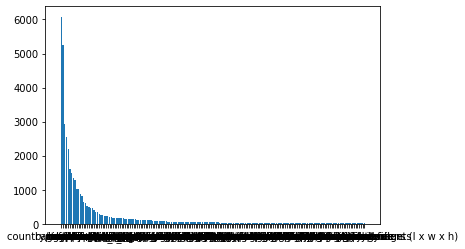

In [9]:
d = dict((k, v) for k, v in freq.items() if v > 20)
array = list(sorted(d, key=lambda k: d[k],reverse=True))[:10]
d= {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
print(d)
print(array)
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
plt.bar(d.keys(),d.values())
plt.show()

In [10]:
df = SA_df

In [11]:
import re
validation_rows = df.loc[df['index'].isin(valid.index)]
validation_rows = validation_rows.loc[validation_rows['category'] == 1]
c1_rows = df.loc[df['category'] == 1]
c3_rows = df.loc[df['category'] == 3]
c4_rows = df.loc[df['category'] == 4]
keep_tags = ['brand', 'size type', "bottoms size (women's)", 'material', 'inseam', 'color', 'rise', 'style', 'silhouette', 'country/region of manufacture']
keep_tags = ['brand', 'material', 'type', 'pattern', 'model', 'country/region of origin', 'mpn', 'country/region of manufacture', 'handle material', 'number of settings']
keep_tags =  ['brand', 'color', 'material', 'type', 'mpn', 'pattern', 'bed size', 'size', 'country/region of manufacture', 'style']
# df = category5
def register_attributes(attribute, all_attributes):
    attribute = attribute[1:-1].lower() # attribute = re.sub(r'[()]','', attribute)
    attribute = re.split(r',(?![^(]*\))', attribute)
    attribute = [a.split(':') for a in attribute]
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        if attribute[i][0] in keep_tags:
            all_attributes.add(attribute[i][0])
    #print(f'atttribute is: {attribute}')
    mapping = {}
    #for i in range(len(attribute) - 1):
    #    if i == len(attribute) - 2:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:]
    #    else:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return(attribute)

def map_attributes(attribute, num_attributes, index_to_attr):
    attribute = attribute[1:-1].lower() # attribute = re.sub(r'[()]','', attribute)
    attribute = re.split(r',(?![^(]*\))', attribute)
    attribute = [a.split(':') for a in attribute]
    all_attributes_for_row = [None] * num_attributes
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        #print(f'index: {attr_to_index[attribute[i][0]]}')
        if len(attribute[i]) > 1 and attribute[i][0] in keep_tags:
            all_attributes_for_row[attr_to_index[attribute[i][0]]] = attribute[i][1]
    mapping = {}
    #for i in range(len(attribute) - 1):
    #    if i == len(attribute) - 2:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:]
    #    else:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return all_attributes_for_row
m = 2000
all_attributes = set()
all_maps = []
for index,row in c4_rows[0:].iterrows():
    register_attributes(row['Tags'], all_attributes)

all_attributes = list(all_attributes)
attr_to_index = {all_attributes[i]: i for i in range(len(all_attributes))}
#print(attr_to_index)
#print(f'numAttributes: {len(all_attributes)}')

for index,row in c4_rows[0:].iterrows():
    all_maps.append(map_attributes(row['Tags'], len(all_attributes), attr_to_index))
possible_vals = set()
from collections import Counter
c = Counter()
for v in all_maps:
    possible_vals.update(v)
    c.update(v)
print(len(possible_vals))
print(c)

20360
Counter({None: 204546, 'does not apply': 12396, '100% cotton': 9725, 'twin': 7860, 'sheet sets': 7615, 'queen': 6815, 'solid': 6393, 'king': 5490, 'flat sheets': 5357, 'white': 4581, 'full': 4482, 'india': 3994, 'unbranded': 3969, 'as described': 3529, 'china': 3368, 'floral': 2978, 'sheet set': 2851, 'multi-color': 2841, 'ralph lauren': 2701, 'pillowcases': 2692, 'blue': 2442, 'united states': 2436, 'cotton blend': 2365, 'modern': 1870, 'cotton': 1844, 'fitted sheets': 1838, 'striped': 1833, 'polyester': 1563, 'microfiber': 1544, 'traditional': 1528, 'pink': 1328, 'gray': 1205, 'flat sheet': 1175, 'not applicable': 1029, 'ivory': 958, 'cottage': 901, 'double': 889, 'contemporary': 871, 'green': 848, 'california king': 840, 'amrapur': 788, 'black': 781, 'red': 719, 'standard': 718, 'handmade': 710, 'beige': 705, 'unknown': 702, 'wamsutta': 702, 'pakistan': 655, 'egyptian cotton': 650, 'multicolor': 607, 'fitted sheet': 594, 'twin extra long': 591, 'purple': 569, 'brown': 564, 'to

In [12]:
#dataframe with attribute values
categories = pd.DataFrame(all_maps)
print(categories)

              0                     1                2  \
0          None                  None             None   
1          crib                  gray             None   
2          None                  None             None   
3         queen                  blue      100% cotton   
4      any size        birch grey fan      100% cotton   
...         ...                   ...              ...   
42861      None              burgundy             None   
42862      None            royal blue             None   
42863      None            gray/white        polyester   
42864      None                 green             None   
42865      None  all colors available  egyptian cotton   

                            3       4      5                6              7  \
0                 home source    None   None   does not apply           None   
1           pottery barn kids    None   None             None  fitted sheets   
2           organics and more    None   None             None  

In [25]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
x = oh.fit_transform(all_maps)
print(x)
print(type(x))

  (0, 394)	1.0
  (0, 4135)	1.0
  (0, 5124)	1.0
  (0, 6784)	1.0
  (0, 10376)	1.0
  (0, 10440)	1.0
  (0, 14986)	1.0
  (0, 18155)	1.0
  (0, 18819)	1.0
  (0, 21276)	1.0
  (1, 138)	1.0
  (1, 1643)	1.0
  (1, 5124)	1.0
  (1, 8103)	1.0
  (1, 10376)	1.0
  (1, 10440)	1.0
  (1, 17402)	1.0
  (1, 17694)	1.0
  (1, 18819)	1.0
  (1, 21266)	1.0
  (2, 394)	1.0
  (2, 4135)	1.0
  (2, 5124)	1.0
  (2, 7897)	1.0
  (2, 10376)	1.0
  :	:
  (42863, 10440)	1.0
  (42863, 17402)	1.0
  (42863, 18019)	1.0
  (42863, 18819)	1.0
  (42863, 19435)	1.0
  (42864, 394)	1.0
  (42864, 1734)	1.0
  (42864, 5124)	1.0
  (42864, 9025)	1.0
  (42864, 10376)	1.0
  (42864, 10440)	1.0
  (42864, 12884)	1.0
  (42864, 18155)	1.0
  (42864, 18819)	1.0
  (42864, 21276)	1.0
  (42865, 394)	1.0
  (42865, 450)	1.0
  (42865, 4838)	1.0
  (42865, 6141)	1.0
  (42865, 9970)	1.0
  (42865, 10401)	1.0
  (42865, 17402)	1.0
  (42865, 18155)	1.0
  (42865, 18819)	1.0
  (42865, 20766)	1.0
<class 'scipy.sparse.csr.csr_matrix'>


In [26]:
oh.categories_

[array(['#010', '#777248', '#9508', ..., 'zzkkhpzg', '並行輸入品', None],
       dtype=object),
 array(['', '.', '1 (one) queen fitted sheet 63" x 81"',
        '1 - twin flat sheet', '1 euro sham', '1 fitted',
        '1 fitted & 1 flat sheet', '1 fitted bottom sheet',
        '1 fitted sheet', '1 fitted sheet & 2 pillowcases',
        '1 fitted sheet & 4 flat sheets',
        '1 fitted sheet + 1 flat sheet + 4 pillowcases', '1 flat',
        '1 flat & 1 fitted sheet', '1 flat & 1 fitted sheets',
        '1 flat / 1 fitted', '1 flat 1 fitted sheet', '1 flat sheet',
        '1 flat sheet & 1 fitted sheet',
        '1 flat sheet+ 2 fitted sheet + 2 pillow',
        '1 flat sheets+1 fitted sheet+4 pillowcase',
        '1 full & 1 fitted sheet', '1 king flat sheet', '1 king sham',
        '1 pc bed skirt', '1 pc fitted sheet', '1 pillowcase',
        '1 queen flat sheet', '1 queen size fitted sheet', '1 sham',
        '1 single pillowcase', '1 single sham', '1#~6# (optional)',
        '100% ca

In [14]:
print(c4_rows.head())

       category                                  primary_image_url  \
32254         4  https://i.ebayimg.com/00/s/NDUwWDU5Mw==/z/YbQA...   
32255         4  http://i.ebayimg.com/00/s/ODQxWDEyMDA=/z/rqoAA...   
32256         4  https://i.ebayimg.com/00/s/OTAwWDEyMDA=/z/ViEA...   
32257         4  http://i.ebayimg.com/00/s/MTYwMFgxMzA2/z/ipIAA...   
32258         4  https://i.ebayimg.com/00/s/MTU5OVgxMjAw/z/OeUA...   

                                               All Links  \
32254  https://i.ebayimg.com/00/s/NDUwWDU5Mw==/z/YbQA...   
32255  http://i.ebayimg.com/00/s/ODQxWDEyMDA=/z/rqoAA...   
32256  https://i.ebayimg.com/00/s/OTAwWDEyMDA=/z/ViEA...   
32257  http://i.ebayimg.com/00/s/MTYwMFgxMzA2/z/ipIAA...   
32258  https://i.ebayimg.com/00/s/MTU5OVgxMjAw/z/OeUA...   

                                                    Tags  index  
32254             (MPN:Does not Apply,Brand:Home Source)  32604  
32255  (Bed Size:Crib,Brand:Pottery Barn Kids,Color:g...  32605  
32256               

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=500, random_state=0,verbose=True, n_init=1, max_iter = 15).fit(x)

Initialization complete
Iteration 0, inertia 210202.0
Iteration 1, inertia 141317.33699224849
Iteration 2, inertia 136484.23293761135
Iteration 3, inertia 135172.39069466988
Iteration 4, inertia 134553.72832249347
Iteration 5, inertia 134234.2608532413
Iteration 6, inertia 134000.4693688299
Iteration 7, inertia 133827.0355664411
Iteration 8, inertia 133704.62802760402
Iteration 9, inertia 133597.15294432908
Iteration 10, inertia 133505.19489926993
Iteration 11, inertia 133439.96893741735
Iteration 12, inertia 133385.36441977537
Iteration 13, inertia 133330.38117556612
Iteration 14, inertia 133290.26528292111


In [16]:
"""
Analysis of K-Means output
"""
count = {}
preds = []
actuals = []
for i, label in enumerate(kmeans.labels_):
    if label not in count:
        count[label] = 0
    count[label] += 1
#     print(f'row {i}\n: {df.iloc[i]}')
    ID = c4_rows.iloc[i]['index']
    if ID in valid.index:
        preds.append(label)
        actual = valid.loc[ID]['Group']
        actuals.append(actual)
#     print(f'ID: {ID}, pred: {label}, actual: {actual}')
print(count)
print(kmeans.inertia_)
print(len(preds))

evaluate(actuals, preds)

{23: 712, 443: 68, 364: 107, 89: 138, 104: 79, 366: 131, 83: 132, 88: 111, 193: 80, 106: 108, 116: 45, 59: 63, 2: 2853, 58: 104, 46: 76, 369: 60, 340: 106, 10: 251, 121: 110, 279: 26, 38: 108, 54: 150, 278: 66, 368: 40, 354: 101, 128: 122, 9: 175, 277: 196, 378: 80, 0: 195, 270: 67, 99: 942, 379: 111, 253: 55, 224: 41, 264: 50, 248: 102, 284: 24, 310: 127, 393: 25, 101: 128, 463: 82, 394: 94, 13: 278, 347: 62, 153: 186, 73: 509, 171: 47, 457: 76, 149: 72, 386: 63, 127: 84, 196: 49, 150: 89, 305: 48, 27: 91, 55: 213, 190: 59, 223: 114, 498: 71, 403: 87, 445: 103, 448: 64, 39: 126, 202: 50, 229: 83, 467: 15, 126: 88, 472: 21, 319: 49, 108: 158, 349: 139, 240: 59, 100: 72, 263: 103, 308: 56, 468: 103, 102: 111, 259: 112, 30: 608, 245: 43, 375: 100, 32: 107, 204: 52, 67: 106, 255: 48, 157: 60, 313: 70, 114: 150, 454: 36, 428: 98, 64: 420, 499: 38, 478: 60, 105: 83, 441: 67, 49: 44, 35: 207, 452: 99, 28: 145, 37: 89, 254: 91, 159: 145, 271: 31, 298: 50, 168: 67, 456: 68, 111: 66, 181: 48, 4

In [17]:
from sklearn.cluster import AgglomerativeClustering

def cluster(data):
    clustering = AgglomerativeClustering(compute_distances=True,compute_full_tree = True,distance_threshold = 0.1,n_clusters=None).fit(data)
    print(clustering)
#     print("LABELS")
#     print(clustering.labels_)
#     print(len(clustering.labels_))
#     print(len(set(clustering.labels_)))
#     print("DISTAnCES")
#     print(clustering.distances_)
#     print("num connected components")
#     print(clustering.n_connected_components_)
    # make this better
    # make this work on the entire dataset
    # fix nonetypes
    # don't punish missing attributes, but punish conflicts. how do we encode this?

    return clustering

In [28]:
x = x.toarray() # only run this once

In [ ]:
# x *= 10
x

In [29]:
full_clustering = [0] * len(x)
count_so_far = 0
j = 0
for label in count:
    print(j)
    indices = [i for i in range(x.shape[0]) if kmeans.labels_[i] == label]
    data = [x[i] for i in indices]
    print(f'now clustering group {label} which has {len(data)} items')
    c = cluster(data)
    for i, label in enumerate(c.labels_):
        full_clustering[indices[i]] = label + count_so_far
#     print(c.labels_)
    count_so_far += len(data)
    j += 1

0
now clustering group 23 which has 712 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
1
now clustering group 443 which has 68 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
2
now clustering group 364 which has 107 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
3
now clustering group 89 which has 138 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
4
now clustering group 104 which has 79 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
5
now clustering group 366 which has 131 items
AgglomerativeClustering(compute_dista

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
46
now clustering group 73 which has 509 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
47
now clustering group 171 which has 47 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
48
now clustering group 457 which has 76 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
49
now clustering group 149 which has 72 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
50
now clustering group 386 which has 63 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
        

now clustering group 64 which has 420 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
92
now clustering group 499 which has 38 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
93
now clustering group 478 which has 60 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
94
now clustering group 105 which has 83 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
95
now clustering group 441 which has 67 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
96
now clustering group 49 which has 44 items
AgglomerativeClustering(compute_dista

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
138
now clustering group 276 which has 170 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
139
now clustering group 68 which has 186 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
140
now clustering group 133 which has 54 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
141
now clustering group 338 which has 58 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
142
now clustering group 79 which has 120 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
  

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
184
now clustering group 43 which has 81 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
185
now clustering group 296 which has 49 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
186
now clustering group 473 which has 45 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
187
now clustering group 250 which has 44 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
188
now clustering group 438 which has 32 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
    

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
230
now clustering group 40 which has 106 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
231
now clustering group 236 which has 154 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
232
now clustering group 70 which has 188 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
233
now clustering group 351 which has 51 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
234
now clustering group 257 which has 75 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
  

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
275
now clustering group 56 which has 142 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
276
now clustering group 166 which has 98 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
277
now clustering group 420 which has 47 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
278
now clustering group 280 which has 48 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
279
now clustering group 440 which has 66 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
   

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
320
now clustering group 466 which has 53 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
321
now clustering group 188 which has 58 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
322
now clustering group 65 which has 153 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
323
now clustering group 387 which has 61 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
324
now clustering group 176 which has 97 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
   

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
365
now clustering group 252 which has 33 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
366
now clustering group 167 which has 91 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
367
now clustering group 147 which has 45 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
368
now clustering group 318 which has 69 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
369
now clustering group 272 which has 34 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
   

now clustering group 162 which has 22 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
411
now clustering group 275 which has 33 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
412
now clustering group 122 which has 93 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
413
now clustering group 426 which has 34 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
414
now clustering group 145 which has 60 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
415
now clustering group 422 which has 43 items
AgglomerativeClustering(compute

AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
460
now clustering group 314 which has 31 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
461
now clustering group 459 which has 53 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
462
now clustering group 246 which has 37 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
463
now clustering group 469 which has 79 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
464
now clustering group 324 which has 22 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
   

In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-33-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [30]:
groups = {}
for i, label in enumerate(full_clustering):
    if label not in groups:
        groups[label] = []
    groups[label].append(i)
groups = {label: groups[label] for label in groups if len(groups[label]) > 1}
print(groups)
for label in groups:
    print(f'GROUP: {label}')
    for item in groups[label]:
        print(c4_rows['Tags'].iloc[[item]].to_string())
    print('-----------------')

{712: [1, 9596, 41928], 780: [2, 176, 177, 2808, 2809, 2810, 2811, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 5730, 5731, 5732, 5905, 5906, 5907, 5908, 5909, 8718, 8719, 8720, 8721, 8722, 11319, 11486, 11487, 11488, 11489, 11490, 11491, 14144, 14313, 14314, 14315, 16881, 16882, 17057, 17058, 17059, 17060, 17061, 17062, 19635, 19636, 19637, 19789, 19790, 19791, 19792, 19793, 22380, 22381, 22382, 22383, 22555, 22556, 22557, 22558, 22559, 22560, 22561, 25345, 26590, 26947, 27524, 27598, 28047, 28832, 29640, 29750, 30356, 30607, 30646, 30931, 31047, 31055, 31289, 32177, 33196, 35059, 36061, 36104, 36108, 36278, 36991, 37383, 38097, 38852, 39222, 39327, 39339, 39504, 39725, 40427, 41187, 41887, 42038, 42063, 42250, 42535, 42702, 42782], 1398: [7, 8, 5735, 5736, 14152, 14153, 14154, 16893, 19643, 19644, 27357, 27782], 1479: [9, 20916], 1788: [13, 154, 155, 180, 184, 347, 356, 675, 916, 1189, 1281, 1296, 1979, 2259, 2271, 2299, 2458, 2460, 2501, 2597, 2604, 2826, 2897, 2958, 2959, 3087, 3098, 

900308    ()
900422    ()
900692    ()
901182    ()
901681    (Modified Item:No,Custom Bundle:No,Non-Domesti...
902013    ()
902387    ()
902388    ()
903447    ()
904359    ()
904606    ()
906949    ()
907009    ()
907091    ()
907101    ()
907408    ()
907947    ()
909888    ()
909932    ()
912891    ()
913757    ()
914625    ()
914822    ()
917229    ()
918685    ()
921464    ()
921670    ()
922089    ()
922493    ()
922783    ()
923138    ()
924134    ()
925046    ()
927124    ()
927250    ()
927486    ()
927494    ()
930147    ()
930502    ()
931683    ()
931912    ()
934212    ()
934654    ()
934925    ()
938733    ()
938903    ()
941000    ()
942116    ()
942361    ()
942432    ()
943697    ()
944016    ()
944736    ()
945392    ()
946814    ()
947777    ()
948649    ()
948952    ()
950744    ()
951449    ()
951874    ()
952613    (Custom Bundle:No,Non-Domestic Product:No,Modi...
952651    ()
953037    ()
953082    ()
953755    ()
954426    ()
956196    ()
956406    ()
957322   

44829    (Brand:Unbranded,MPN:Does Not Apply,Country/Re...
46959    (Material:as described,MPN:Does Not Apply,Size...
47342    (Size:as described,Brand:Unbranded,Country/Reg...
47777    (Designer/Brand:Unbranded,Size:as described,Br...
48283    (Color:Beige,Material:as described,Brand:Unbra...
48300    (MPN:Does Not Apply,Material:as described,Colo...
50535    (Material:as described,Size:as described,Color...
51663    (Designer/Brand:Unbranded,Material:as describe...
52895    (Size:as described,Color:Beige,Brand:Unbranded...
188807    (Color:Beige,Country/Region of Manufacture:Chi...
191683    (Size:as described,Designer/Brand:Unbranded,Ma...
564104    (MPN:Does Not Apply,Size:as described,Material...
876514    (Country/Region of Manufacture:China,Color:Bei...
880191    (Brand:Unbranded,MPN:Does Not Apply,Country/Re...
895423    (Country/Region of Manufacture:China,MPN:Does ...
914676    (Brand:Unbranded,Color:Beige,Size:as described...
925113    (Country/Region of Manufacture:China,MP

49545    (Designer/Brand:Unbranded,MPN:Does Not Apply,M...
561732    (Quantity:1,Designer/Brand:Unbranded,Material:...
972861    (Style:3,Country/Region of Manufacture:China,D...
979658    (Brand:Unbranded,Material:as described,Country...
-----------------
GROUP: 22868
32589    (Country/Region of Manufacture:China,MPN:Does ...
33329    (Color:Blue,Designer/Brand:Unbranded,Material:...
34413    (Color:Blue,Brand:Unbranded,Style:7,Size:as de...
34731    (Style:7,Country/Region of Manufacture:China,C...
35315    (Size:as described,MPN:Does Not Apply,Material...
36659    (MPN:Does Not Apply,Color:Blue,Style:7,Quantit...
37341    (Style:7,Country/Region of Manufacture:China,S...
44947    (Style:7,Material:as described,Country/Region ...
45530    (Material:as described,MPN:Does Not Apply,Size...
191234    (Brand:Unbranded,Country/Region of Manufacture...
917558    (Style:7,Size:as described,Quantity:1,Material...
922357    (Color:Blue,Country/Region of Manufacture:Chin...
929325    (Size:as 

50546    (EAN:0696397794082,ISBN:Not Applicable,Publish...
50548    (Manufacturer:Linen Plus,EAN:0696605675271,ISB...
193305    (ProductGroup:Home,MPN:Not Applicable,Brand:Li...
564428    (Manufacturer:Linen Plus,ProductGroup:Home,Lab...
964507    (Brand:Linen Plus,Label:Linen Plus,MPN:Not App...
-----------------
GROUP: 1930
32644    (Brand:Threshold)
33348    (Brand:Threshold)
51951    (Brand:Threshold)
190154    (Brand:Threshold)
192079    (Brand:Threshold)
562447    (Brand:Threshold)
565143    (Brand:Threshold)
565147    (Brand:Threshold)
876467    (Brand:Threshold)
933424    (Brand:Threshold)
934978    (Brand:Threshold)
950601    (Brand:Threshold)
977059    (Brand:Threshold)
-----------------
GROUP: 20219
32646    (Country/Region of Manufacture:China,Brand:Unb...
52431    (Style:11,Designer/Brand:Unbranded,Color:White...
562877    (Brand:Unbranded,Designer/Brand:Unbranded,Coun...
566455    (Brand:Unbranded,Color:White,Designer/Brand:Un...
920669    (Country/Region of Manufacture:C

983741    (MPN:does not apply,Category:Sheet & Pillowcas...
985716    (UPC:does not apply,Category:Sheet & Pillowcas...
987161    (UPC:does not apply,Brand:Does not apply,Categ...
988702    (Size:Queen,Brand:Does not apply,Category:Shee...
990289    (Category:Bedding Accessories,Size:Queen,Tax:T...
991990    (MPN:does not apply,Size:Queen,UPC:does not ap...
-----------------
GROUP: 14361
32724    (Tax:This item without tax,Category:Sheet & Pi...
943810    (MPN:does not apply,Size:Olympic Queen,UPC:doe...
-----------------
GROUP: 26242
32725    (Model Number:641022746950,MPN:does not apply,...
32911    (ISBN:Does Not Apply,Object Type:Does Not Appl...
34001    (MPN:does not apply,Brand:Does not apply,UPC:d...
34559    (Shipping:Free and Fast Two-day shipping,Tax:T...
34729    (MPN:does not apply,Brand:Does not apply,Categ...
35542    (MPN:does not apply,Category:Pillowcases,Shipp...
35544    (Brand:Does not apply,UPC:does not apply,Tax:T...
35545    (Brand:Does not apply,UPC:does not ap

926195    (UPC:does not apply,MPN:does not apply,Categor...
-----------------
GROUP: 17662
32754    (Size:Queen,Category:Sheet & Pillowcase Sets,B...
52181    (Brand:CGK Unlimited,Color:Beige,Size:Queen,MP...
-----------------
GROUP: 24048
32762    (Department:Adults,Brand:Charisma,Type:Sheet S...
47911    (MPN:844178073769,Material:100% Polyester Micr...
934341    (Care Instructions:Machine Wash/Cold,Material:...
-----------------
GROUP: 27576
32779    (Brand:Pottery Barn Teen,Bed Size:Twin,Color:B...
50744    (Color:Blue,Brand:Pottery Barn Teen,Material:1...
970756    (MPN:Does Not Apply,Color:Blue,Brand:Pottery B...
-----------------
GROUP: 19783
32783    (Brand:Pottery Barn Kids,Bed Size:Twin,Type:Fl...
32860    (Brand:Pottery Barn Kids,Bed Size:Twin,Color:W...
35611    (Color:White,Material:100% Cotton,Bed Size:Twi...
35625    (Material:100% Cotton,Color:White,Type:Flat Sh...
45419    (Material:100% Cotton,Bed Size:Twin,Color:Whit...
50712    (Type:Flat Sheets,Bed Size:Twin,Brand:

37817    (Brand:unbranded)
44707    (Pillowcase Size:Standard,Brand:Unbranded)
45620    (Brand:Unbranded)
45832    (Brand:Unbranded)
46099    (Brand:Unbranded)
46242    (Theme:Love,Closure Type:Zipper,Shape:Square,B...
46259    (Brand:Unbranded)
46964    (Brand:Unbranded)
46965    (Brand:Unbranded)
47083    (Brand:Unbranded)
47084    (Brand:Unbranded)
47192    (Brand:Unbranded)
47915    (Brand:Unbranded)
48555    (Brand:Unbranded)
49909    (Brand:Unbranded)
50800    (Brand:Unbranded)
51494    (Brand:Unbranded)
51640    (Brand:Unbranded,Features:Hand Painted)
51721    (UPC:711091855041,Brand:Unbranded)
52228    (Brand:Unbranded)
52672    (Brand:Unbranded)
52673    (Brand:Unbranded)
52674    (Brand:Unbranded)
189216    (Brand:Unbranded)
189217    (Brand:Unbranded)
189352    (Non-Domestic Product:No,Modified Item:No,Bran...
189788    (Brand:Unbranded)
189995    (Brand:Unbranded)
190230    (Room:Bedroom,Brand:Unbranded)
191965    (Brand:Unbranded)
192211    (Brand:Unbranded)
192422    (Bra

566546    (Type:Sheet Sets,Color:White,Bed Size:Twin,Bra...
-----------------
GROUP: 32710
33070    (Color:Blue,Custom Bundle:No,Modified Item:No,...
51050    (Brand:DKNY,Bed Size:California King,Pattern:F...
-----------------
GROUP: 2379
33080    (Brand:kmart)
33081    (Brand:kmart)
192157    (Brand:kmart)
-----------------
GROUP: 32808
33083    (Style:Indian,Color:Multicolor,Department:Adul...
33084    (Packaging:1xBedsheet 2xPillow Cover,Labels & ...
48228    (Size:Queen,Style:Indian,Packaging:1xBedsheet ...
930026    (GSM (Grams per Square Meter):Over 800,Brand:U...
-----------------
GROUP: 32807
33085    (Style:Indian,Color:Multicolor,Type:Bed Sheets...
48229    (Country/Region of Manufacture:India,Color:Mul...
192161    (Department:Adults,Baby,Kids,Teens,Size:Queen,...
564970    (Color:Multicolor,Department:Adults,Baby,Kids,...
899192    (Style:Indian,Item Length:82 Inch,GSM (Grams p...
908797    (GSM (Grams per Square Meter):Over 800,Color:M...
911915    (Item Width:89 inch,Labe

33275    (Size:King,Type:Fitted Sheet,Brand:Lauren Ralp...
188853    (Brand:Lauren Ralph Lauren,Features:Deep Fitte...
-----------------
GROUP: 34600
33278    (Bed Size:King,Style:Shabby Chic,Type:Sheet Se...
904709    (Pattern:Vintage Lace,Type:Sheet Sets,Color:Mu...
-----------------
GROUP: 24512
33289    (Model:Does Not Apply,Color:Black,Manufacturer...
49600    (Item Weight:13.3 ounces,EAN:07445009658679,Co...
984250    (Manufacturer:NTBAY,item_length:20.0,Shipping ...
-----------------
GROUP: 43
33291    (Brand:Belles & Whistles,ISBN:N/A,MPN:Does not...
33292    (ISBN:N/A,MPN:Does not apply,Brand:Belles & Wh...
45640    (Brand:Belles & Whistles,MPN:Does not apply,IS...
189628    (MPN:Does not apply,ISBN:N/A,Brand:Belles & Wh...
565185    (ISBN:N/A,MPN:Does not apply,Brand:Belles & Wh...
565186    (MPN:Does not apply,Brand:Belles & Whistles,IS...
974606    (Brand:Belles & Whistles,MPN:Does not apply,IS...
-----------------
GROUP: 20007
33299    (Pillowcase Size:Twin,Color:White,Bra

192453    (Brand:Signoria Firenze)
192454    (Brand:Signoria Firenze)
192455    (Brand:Signoria Firenze)
193413    (Brand:Signoria Firenze)
193414    (Brand:Signoria Firenze)
193415    (Brand:Signoria Firenze)
193416    (Brand:Signoria Firenze)
193418    (Brand:Signoria Firenze)
562494    (Brand:Signoria Firenze)
562495    (Brand:Signoria Firenze)
562496    (Brand:Signoria Firenze)
563471    (Brand:Signoria Firenze)
563472    (Brand:Signoria Firenze)
563473    (Brand:Signoria Firenze)
563476    (Brand:Signoria Firenze)
563478    (Brand:Signoria Firenze)
563479    (Brand:Signoria Firenze)
563480    (Brand:Signoria Firenze)
565275    (Brand:Signoria Firenze)
565278    (Brand:Signoria Firenze)
565279    (Brand:Signoria Firenze)
566270    (Brand:Signoria Firenze)
566271    (Brand:Signoria Firenze)
566272    (Brand:Signoria Firenze)
566273    (Brand:Signoria Firenze)
877256    (Brand:Signoria Firenze)
878203    (Brand:Signoria Firenze)
880145    (Brand:Signoria Firenze)
882369    (Brand:Sig

190025    (Size:as described,Brand:Unbranded,Color:Camel...
190721    (Size:as described,Country/Region of Manufactu...
191687    (Material:as described,Brand:Unbranded,Color:C...
192219    (Designer/Brand:Unbranded,Country/Region of Ma...
192262    (Material:as described,Size:as described,Quant...
193498    (Material:as described,Brand:Unbranded,Country...
563500    (Designer/Brand:Unbranded,MPN:Does Not Apply,M...
564531    (Country/Region of Manufacture:China,Material:...
874060    (MPN:Does Not Apply,Size:as described,Material...
894051    (Designer/Brand:Unbranded,Size:as described,Co...
897250    (Country/Region of Manufacture:China,Color:Cam...
907695    (Material:as described,Brand:Unbranded,Color:C...
914608    (Designer/Brand:Unbranded,Color:Camel,MPN:Does...
938917    (Brand:Unbranded,Material:as described,Size:as...
952588    (Material:as described,Country/Region of Manuf...
955123    (Size:as described,Country/Region of Manufactu...
967075    (Size:as described,Designer/Br

973182    (Size:190x80cm,Material:Polyester,Quantity:1,C...
-----------------
GROUP: 38144
33752    (Shipping:Free,Color:Multi-Color,MPN:Does Not ...
192783    (MPN:Does Not Apply,Shipping:Free,Country/Regi...
562832    (MPN:Does Not Apply,Shipping:Free,Country/Regi...
-----------------
GROUP: 12163
33753    (Manufacturer:Cosy House Collection,ISBN:Not A...
45184    (Binding:Kitchen,Color:Turquoise,MPN:Not Appli...
189766    (EAN:0691163831442,UPC:691163831442,Publisher:...
190876    (Manufacturer:Cosy House Collection,UPC:689827...
192314    (Manufacturer:Cosy House Collection,MPN:Not Ap...
562950    (MPN:Not Applicable,Color:Turquoise,ISBN:Not A...
882273    (UPC:689743252220,Publisher:Cosy House Collect...
978990    (MPN:Not Applicable,UPC:691043389827,ProductGr...
-----------------
GROUP: 38220
33759    (UPC:does not apply,Tax:This listing not inclu...
35210    (Model Number:MZ200545,Category:Sheet & Pillow...
36018    (Payment:Paypal,Shipping Cost:Free shipping,Br...
36951    (UPC

36919    (Country/Region of Manufacture:India,Thickness...
46331    (Washable:Not specified,Size:Double,Thickness:...
46332    (Material:Cotton,Brand:Aazeem,MPN:Does not app...
46340    (Material:Cotton,MPN:Does not apply,Color:Mult...
46341    (Pattern:Abstract,Color:Multi,Brand:Aazeem,Was...
46342    (Washable:Not specified,Brand:Aazeem,Shape:Not...
46345    (Brand:Aazeem,Thickness:Not specified,MPN:Does...
46348    (Color:Multi,Shape:Not specified,Size:Double,T...
46349    (Shape:Not specified,Pattern:Abstract,Wash Car...
46353    (Shape:Not specified,Pattern:Abstract,Material...
46354    (Transparency:Not specified,Washable:Not speci...
49115    (Shape:Not specified,Country/Region of Manufac...
49117    (Transparency:Not specified,Size:Double,Color:...
49118    (Shape:Tear Drop,Size:Double,Thickness:Not spe...
49120    (Color:Multi,Transparency:Not specified,Size:D...
49122    (Color:Multi,Brand:Aazeem,Wash Care:Machine Wa...
49124    (MPN:Does not apply,Pattern:Abstract,Shape:Tea.

193561    (Type:Pillowcases,Pillowcase Size:Standard,MPN...
-----------------
GROUP: 12270
34174    (Dimensions:L 10.98 x W 9.25 x H 0.51 inches,B...
52131    (UPC:723980399062,Pillowcase Size:Toddler,Dime...
-----------------
GROUP: 14
34185    (EAN:0807000140299,MPN:does not apply,UPC:8070...
37133    (Brand:Seasons Collection,MPN:does not apply)
46547    (Brand:Seasons Collection,MPN:does not apply)
49330    (Brand:Seasons Collection,MPN:does not apply)
898848    (MPN:Does Not Apply,Brand:Seasons Collection,M...
915671    (Brand:Seasons Collection,MPN:does not apply)
988315    (MPN:does not apply,Brand:Seasons Collection)
988386    (MPN:does not apply,Brand:Seasons Collection)
-----------------
GROUP: 15
34186    (MPN:does not apply,Brand:Bed Bath & Beyond)
37101    (Brand:Bed Bath & Beyond,MPN:does not apply)
37104    (Brand:Bed Bath & Beyond,MPN:does not apply)
46524    (Brand:Bed Bath & Beyond,MPN:does not apply)
52112    (Brand:Bed Bath & Beyond,MPN:does not apply)
193231    (Br

937827    (Designer/Brand:Unbranded,Country/Region of Ma...
951157    (Style:8,Size:as described,Quantity:1,Material...
983901    (Designer/Brand:Unbranded,Color:Light Green,Br...
-----------------
GROUP: 12066
34408    (Label:Cosy House Collection,ISBN:Not Applicab...
48185    (Dimensions:L 8.46 x W 5.16 x H 1.73 inches,EA...
51362    (EAN:0689989293155,MPN:Not Applicable,Color:Bl...
979580    (Label:Cosy House Collection,Manufacturer:Cosy...
-----------------
GROUP: 22828
34414    (Brand:Unbranded,Material:as described,Style:3...
563162    (Country/Region of Manufacture:China,Quantity:...
888912    (Color:Pink-190x80cm,Style:3,Designer/Brand:Un...
-----------------
GROUP: 20188
34415    (Size:as described,MPN:Does Not Apply,Brand:Un...
49543    (MPN:Does Not Apply,Brand:Unbranded,Style:9,Si...
563501    (Material:as described,MPN:Does Not Apply,Coun...
564504    (Country/Region of Manufacture:China,Designer/...
910883    (Quantity:1,Color:Russet,Brand:Unbranded,Mater...
959310    (Co

34591    (MPN:Does not apply,Size:Body,UPC:Does not app...
34592    (GSM (Grams per Square Meter):150 to 300,MPN:D...
36113    (Personalized:No,Pattern:Abstract,Model:Cloud,...
36700    (Model:Cloud,Size:Body,Labels & Certifications...
37492    (EAN:Does not apply,Color:Beige,Thread Count:2...
37493    (Brand:Does not apply,Style:African,MPN:Does n...
52773    (Personalized:No,Style:African,Thread Count:20...
193614    (Features:2-in-1,UPC:Does not apply,EAN:Does n...
565676    (ISBN:Does not apply,Color:Beige,Character Fam...
962945    (Labels & Certifications:NOMITE Mark,EAN:Does ...
987070    (Size:Body,Character Family:101 Dalmatians,Col...
-----------------
GROUP: 27206
34594    (Pattern:TV, Movies & Music,Pillowcase Size:St...
965428    (Pillowcase Size:Standard,Color:Multi-Color,Ma...
-----------------
GROUP: 8972
34596    (Product Dimensions:14 x 10.9 x 4 inches,Model...
51352    (item_width:4.0,Size:Queen,Brand:SONORO KATE,C...
189874    (item_width:4.0,Model:Does Not Apply,Br

34983    (Brand:Unbranded,Color:White,Bed Size:King)
891335    (Brand:Unbranded,Bed Size:King,Color:White)
-----------------
GROUP: 11434
34984    (Brand:Unbranded,Bed Size:Queen,Color:White)
563701    (Bed Size:Queen,Brand:Unbranded,Thread Count:3...
564079    (Color:White,Brand:Unbranded,Bed Size:Queen)
-----------------
GROUP: 38395
35008    (Bed Size:90X 100 in Inches Queen size,Country...
884653    (Color:Navy Blue,Bed Size:90X 100 in Inches Qu...
-----------------
GROUP: 37682
35028    (Model:109485,Binding:Kitchen,PartNumber:10948...
35104    (UPC:806222209715,MPN:109485,Weight:2.4 lbs,EA...
36087    (Label:Royal Opulence,PartNumber:109485,MPN:10...
48487    (Model:109485,Label:Royal Opulence,ProductGrou...
192716    (PartNumber:109485,Binding:Kitchen,Brand:Royal...
563941    (PartNumber:109485,MPN:109485,Label:Royal Opul...
565785    (Brand:Royal Opulence,PartNumber:109485,Publis...
907223    (MPN:109485,Model:109485,Manufacturer:Royal Op...
933729    (PartNumber:109485,Model:1

566442    (Quantity:2,Country/Region of Manufacture:Chin...
873594    (Material:as described,MPN:Does Not Apply,Quan...
911991    (Designer/Brand:Unbranded,MPN:Does Not Apply,C...
925700    (Country/Region of Manufacture:China,Designer/...
967515    (MPN:Does Not Apply,Country/Region of Manufact...
975807    (Material:as described,Quantity:2,Size:as desc...
983694    (Country/Region of Manufacture:China,MPN:Does ...
985017    (Size:as described,Quantity:2,Material:as desc...
-----------------
GROUP: 17842
35407    (Size:as described,Material:as described,MPN:D...
36376    (MPN:Does Not Apply,Color:Flower A_Brown,Brand...
190028    (Brand:Unbranded,MPN:Does Not Apply,Color:Flow...
888476    (Material:as described,MPN:Does Not Apply,Colo...
939512    (Country/Region of Manufacture:China,MPN:Does ...
983704    (Color:Flower A_Brown,Size:as described,Countr...
-----------------
GROUP: 20693
35414    (Brand:Ralph Lauren,Material:100% Cotton,Pillo...
880193    (Material:100% Cotton,Brand:Ral

192158    (Brand:west elm)
562119    (Brand:west elm)
562197    (Brand:west elm)
562257    (Brand:west elm)
564900    (Brand:west elm)
564979    (Brand:west elm)
883506    (Brand:west elm)
884769    (Brand:west elm)
907654    (Brand:west elm)
914370    (Brand:west elm)
923131    (Brand:west elm)
933118    (Brand:west elm)
935165    (Brand:west elm)
938474    (Brand:west elm)
962171    (Brand:west elm)
973443    (Brand:west elm)
978933    (Brand:west elm)
979431    (Brand:west elm)
-----------------
GROUP: 18848
35928    (Material:100% Cotton,Brand:Threshold,Type:Fla...
189669    (Type:Flat Sheets,Material:100% Cotton,Color:I...
561626    (Bed Size:Twin Extra Long,Modified Item:No,Thr...
-----------------
GROUP: 1832
35930    (Brand:Ralph Lauren)
36349    (Brand:Ralph Lauren)
36586    (Modified Item:No,Brand:Ralph Lauren,Custom Bu...
44938    (Model:Donovan Damask,Brand:Ralph Lauren)
48806    (Brand:Ralph Lauren)
188673    (Brand:Ralph Lauren)
906165    (Brand:Ralph Lauren)
926308    (B

892278    (ProductGroup:Home,MPN:Not Applicable,UPC:6962...
969587    (Brand:Pizuna,UPC:692761166288,Publisher:Pizun...
973681    (Brand:Pizuna,EAN:0689791030788,ISBN:Not Appli...
-----------------
GROUP: 38141
36631    (Color:Pink,Country/Region of Manufacture:Indi...
49319    (MPN:Does Not Apply,Brand:Unbranded,Color:Pink...
561602    (Material:100% Cotton,Country/Region of Manufa...
-----------------
GROUP: 17794
36636    (Material:Cotton,Designer/Brand:Unbranded,Patt...
564515    (Material:Cotton,Country/Region of Manufacture...
899316    (Material:Cotton,Pattern:European,Size:as desc...
917696    (Material:Cotton,Theme:Embroidery,Designer/Bra...
-----------------
GROUP: 21739
36637    (Brand:Unbranded,Color:Blue,MPN:Does Not Apply...
37836    (MPN:Does Not Apply,Designer/Brand:Unbranded,M...
49865    (Designer/Brand:Unbranded,Color:Blue,Country/R...
906128    (Material:Soft Cotton,Country/Region of Manufa...
-----------------
GROUP: 19179
36643    (Designer/Brand:Unbranded,Size:45

49535    (Brand:Elegant Sleep)
193440    (Brand:Elegant Sleep)
566289    (Brand:Elegant Sleep)
566290    (Brand:Elegant Sleep)
888338    (Brand:Elegant Sleep)
919692    (Brand:Elegant Sleep)
945942    (Brand:Elegant Sleep)
950758    (Brand:Elegant Sleep)
-----------------
GROUP: 17873
37329    (Designer/Brand:Unbranded,Country/Region of Ma...
188948    (Material:as described,Designer/Brand:Unbrande...
912697    (Brand:Unbranded,Country/Region of Manufacture...
914267    (Brand:Unbranded,Color:Brown-Style 1,MPN:Does ...
-----------------
GROUP: 17821
37330    (Quantity:1,Designer/Brand:Unbranded,Size:as d...
47752    (MPN:Does Not Apply,Quantity:1,Material:as des...
188945    (Brand:Unbranded,Quantity:1,Color:Apple Green,...
563509    (Country/Region of Manufacture:China,Quantity:...
922235    (Quantity:1,Designer/Brand:Unbranded,Country/R...
953420    (MPN:Does Not Apply,Quantity:1,Brand:Unbranded...
-----------------
GROUP: 17862
37331    (Style:19,Color:Dark Blue-180x60cm,Brand:Unbra

47320    (Color:maroon,Bed Size:90X 100 in Inches Queen...
-----------------
GROUP: 41803
37931    (Bed Size:Queen,Type:5 PCs Split Sheet Set,Thr...
52971    (Model:bright-bedding-2019,MPN:Does Not Apply,...
-----------------
GROUP: 2421
37941    (Brand:IKEA)
189998    (Brand:ikea)
957328    (Brand:IKEA)
-----------------
GROUP: 27129
37945    (Closure Type:Zipper,Model:Pillow Case Waterpr...
956179    (Brand:Case,Style:Pillow Cover Waterproof,Serv...
-----------------
GROUP: 41975
37954    (Size:King,Department:Unisex,MPN:Does not appl...
50157    (Care Instructions:Hand Wash Or Machine Wash,I...
191311    (Country/Region of Manufacture:India,Product L...
194054    (Type:Bedding Set,Product Line:Originals,Shape...
564117    (Shape:Square,Size:King,Style:Modern,Product L...
920247    (Department:Unisex,GSM (Grams per Square Meter...
942900    (Type:Bedding Set,Brand:La Victoria,MPN:Does n...
956399    (Shape:Square,Size:King,Labels & Certification...
-----------------
GROUP: 152
37959 

50952    (Brand:Burton)
-----------------
GROUP: 6717
45148    (MPN:P236,SKU:hm53356,Style:Throw pillow cover...
954512    (SKU:hm53355,Brand:Hemet,Style:Throw pillow co...
-----------------
GROUP: 30620
45153    (Size:KING,Manufacture_country:India,Weight:8....
193849    (MPN:Does not apply,Manufacture_country:India,...
-----------------
GROUP: 16701
45160    (Brand:Pottery Barn Kids,Color:Multi-Color,Pil...
959980    (Color:Multi-Color,Type:Pillowcases,Material:1...
-----------------
GROUP: 1241
45161    (Material:Flannel,Pillowcase Size:Standard,Col...
564713    (Material:Flannel,Brand:Pottery Barn Kids,Bed ...
-----------------
GROUP: 10310
45186    (Color:BLUE,Bed Size:Twin,Brand:Ralph Lauren,P...
932022    (Size:Twin,Style:Cottage,Bed Size:Twin,Brand:R...
-----------------
GROUP: 13657
45203    (Label:Charisma,Publisher:Charisma,ProductGrou...
193602    (Color:White,Manufacturer:Charisma,Label:Chari...
-----------------
GROUP: 24523
45212    (Size:Single (American twin),Brand:Dis

564622    (Color:Gray,ProductGroup:Home,Publisher:Basic ...
882555    (UPC:689998342660,EAN:0689998342660,Color:Gray...
-----------------
GROUP: 6757
46009    (UPC:695641818239,MPN:FD23001-QS5,Color:Style5...
566520    (Model:FD23001-QS5,Manufacturer:FenDie,Label:F...
-----------------
GROUP: 166
46011    (Brand:Pillowfort,MPN:does not apply)
874598    (Custom Bundle:No,Brand:PILLOWFORT,MPN:DOES NO...
-----------------
GROUP: 14344
46015    (Brand:Does not apply,Category:Pillowcases,Tax...
50308    (Brand:Does not apply,No Sale Tax:Yes,MPN:does...
193283    (Package include:2 pillow case.,MPN:does not a...
900937    (Free Shipping:Yes,Free Shipping Return:Yes,MP...
-----------------
GROUP: 36587
46027    (Thread Count:400 TC,Country/Region of Manufac...
919786    (Size:Travel,Thread Count:400 TC,Brand:linens....
-----------------
GROUP: 1863
46030    (Brand:PJ Masks,MPN:MA7908)
561780    (Weight:2.1 pounds,Height:0.1 inches,Manufactu...
-----------------
GROUP: 8457
46034    (Color:Sil

967616    (Size:as described,Designer/Brand:Unbranded,MP...
989422    (Designer/Brand:Unbranded,Country/Region of Ma...
-----------------
GROUP: 20280
46738    (Size:as described,Color:Dark Blue-L,Country/R...
193144    (Quantity:1,Designer/Brand:Unbranded,MPN:Does ...
193478    (MPN:Does Not Apply,Material:as described,Styl...
919621    (Designer/Brand:Unbranded,Brand:Unbranded,Quan...
956669    (Country/Region of Manufacture:China,Size:as d...
-----------------
GROUP: 17819
46739    (Designer/Brand:Unbranded,MPN:Does Not Apply,M...
47091    (Country/Region of Manufacture:China,Designer/...
563641    (Designer/Brand:Unbranded,Brand:Unbranded,Styl...
564508    (Material:as described,Color:Wine Red-S,Brand:...
987629    (Material:as described,Country/Region of Manuf...
-----------------
GROUP: 33590
46740    (Designer/Brand:Unbranded,Country/Region of Ma...
46900    (Color:Purple,Country/Region of Manufacture:Ch...
973192    (MPN:Does Not Apply,Color:Purple,Material:as d...
982851    (M

52937    (Brand:Unbranded,Bed Size:King,Color:Taupe)
-----------------
GROUP: 76
47313    (MPN:Does Not Apply,Brand:Heartland®)
191278    (Brand:Heartland®,MPN:Does Not Apply)
911222    (MPN:Does Not Apply,Brand:Heartland®)
-----------------
GROUP: 5231
47322    (Pillowcase Size:Standard,Room:Bedroom,Brand:S...
566776    (Bed Size:Twin,Pillowcase Size:Standard,Room:B...
-----------------
GROUP: 5825
47324    (Bed Size:Full,Color:White,Type:Sheet Sets,Bra...
191287    (Color:White,Brand:White,Bed Size:Full,Type:Sh...
897982    (Brand:White,Color:White,Type:Sheet Sets,Bed S...
923108    (Brand:White,Color:White,Type:Sheet Sets,Bed S...
928270    (Color:White,Bed Size:Full,Type:Sheet Sets,Bra...
-----------------
GROUP: 1921
47328    (Brand:Hotel Style)
915070    (Brand:Hotel Style)
917844    (Brand:Hotel Style)
-----------------
GROUP: 96
47331    (ASIN:B012FOJ6LC,MPN:Does not Apply,Brand:Unbr...
931316    (Brand:Unbranded/Generic,UPC:Does not apply,Ma...
965987    (Brand:Unbranded/Gener

967118    (Type:Flat Sheets,Material:100% Cotton,Bed Siz...
-----------------
GROUP: 27399
48023    (Material:100% Cotton,Bed Size:Full,Type:Flat ...
50759    (Brand:Pottery Barn Kids,Type:Flat Sheets,Mate...
-----------------
GROUP: 30422
48038    (Color:Red,Pillow Cover Size:17X27 Inches (43X...
191991    (Brand:Handmade,Weight:1.100 Kg Approx,Materia...
562005    (Bed Sheet Size:90 X 108 Inches (228 X 274 Cm)...
564811    (Bed Sheet Size:90 X 108 Inches (228 X 274 Cm)...
976631    (Pillow In Set:2 Pillow,Set Include::1 Bedshee...
-----------------
GROUP: 8452
48046    (item_width:3.1,Item model number:COMIN18JU070...
189913    (UPC:744110243758,MPN:Does Not Apply,Model:COM...
-----------------
GROUP: 30471
48051    (MPN:Not Applicable,ISBN:Not Applicable,EAN:06...
565975    (ISBN:Not Applicable,EAN:0689551220855,MPN:Not...
913550    (Label:Wavva,ProductGroup:Home,Manufacturer:Wa...
958850    (UPC:695639610234,Label:Wavva,MPN:Not Applicab...
-----------------
GROUP: 12351
48052    (B

48676    (Type:Sheet Set 4 PCs,MPN:Does not apply,Mater...
888983    (Type:Sheet Set 4 PCs,Size:Twin,Material:100% ...
-----------------
GROUP: 21376
48690    (item_length:30.0,Item model number:pc200-12,i...
192349    (Model:pc200-12,Item Weight:2.95 pounds,EAN:03...
562394    (Package Quantity:24,item_length:30.0,item_wid...
-----------------
GROUP: 32340
48693    (Bed Size:Full,Threadcount:200 or less,Color:W...
51574    (Brand:Fine Hotel Collection from Union Hospit...
189992    (Room:Hotel Linen,Brand:Fine Hotel Collection ...
192737    (Color:White,Threadcount:200 or less,Type:Flat...
562781    (Threadcount:200 or less,Color:White,Brand:Fin...
938795    (Color:White,Type:Flat Sheets,Material:Cotton ...
-----------------
GROUP: 33666
48701    (Color:Does Not Apply,Shipping Weight:3.53 pou...
192649    (Item model number:COMIN18JU020469,Model:COMIN...
-----------------
GROUP: 10371
48711    (Pillowcase Size:Standard,Room:Bedroom,Bed Siz...
49358    (Bed Size:Full)
190436    (Bed Si

190040    (Country/Region of Manufacture:China,Brand:Unb...
193467    (Designer/Brand:Unbranded,Brand:Unbranded,Colo...
561736    (Size:as described,Designer/Brand:Unbranded,Br...
562260    (Brand:Unbranded,Size:as described,Designer/Br...
563696    (Country/Region of Manufacture:China,Color:Cof...
939814    (Designer/Brand:Unbranded,MPN:Does Not Apply,S...
941134    (Brand:Unbranded,Designer/Brand:Unbranded,Colo...
943954    (Country/Region of Manufacture:China,Color:Cof...
971545    (Color:Coffee,Country/Region of Manufacture:Ch...
974559    (Color:Coffee,Country/Region of Manufacture:Ch...
-----------------
GROUP: 27659
49529    (Style:Modern,Pattern:Solid,Modified Item:No,C...
193436    (Brand:Marcielo,Type:Sheet Sets,Color:light Gr...
566264    (Color:light Gray,Brand:Marcielo,Bed Size:Full...
566287    (Custom Bundle:No,Thread Count:401-600,Modifie...
-----------------
GROUP: 17624
49536    (Designer/Brand:Unbranded,Country/Region of Ma...
193462    (Designer/Brand:Unbranded,Quan

565869    (ProductGroup:Home,Binding:Kitchen,EAN:0692619...
-----------------
GROUP: 14366
50310    (MPN:does not apply,Model Number:woot15shtkaqu...
564635    (Tax:This item without tax,UPC:does not apply,...
-----------------
GROUP: 21604
50340    (Country/Region of Manufacture:United States,T...
926333    (Country/Region of Manufacture:United States,B...
-----------------
GROUP: 1851
50353    (MPN:100210618101-01-01,Brand:Disney (Disney))
964903    (Brand:Disney (Disney),Publisher:Disney (Disne...
-----------------
GROUP: 33053
50361    (Dimensions:L 14.25 x W 11.1 x H 2.99 inches,W...
51791    (ProductGroup:Home,MPN:Not Applicable,Label:Ba...
953019    (Manufacturer:Basic Choice,EAN:0691163815640,C...
-----------------
GROUP: 6705
50363    (ISBN:Not Applicable,UPC:Not Applicable,Brand:...
981731    (Dimensions:L 11.14 x W 11.02 x H 2.09 inches,...
-----------------
GROUP: 31166
50364    (Material:Polyester,UPC:Does not apply,EAN:Doe...
912109    (EAN:Does not apply,ISBN:Does not ap

562617    (Material:as described,Pattern:solid,Brand:Unb...
911696    (Brand:Unbranded,Country/Region of Manufacture...
-----------------
GROUP: 6673
50972    (Dimensions:L 17.1 x W 10.5 x H 4.9 inches,UPC...
912211    (Model:SYNCHKG053348,Label:Southshore Fine Lin...
959592    (Model:SYNCHKG053348,MPN:SYNCHKG053348,Manufac...
-----------------
GROUP: 20787
50976    (MPN:PvoltF,Material:Polyester,Bed Size:Full,T...
903272    (Style:Tropical,Color:Green,Bed Size:Full,MPN:...
-----------------
GROUP: 4977
50991    (Material:Polyester,Pillowcase Size:Standard,C...
566756    (Pillowcase Size:Standard,Material:Polyester,B...
-----------------
GROUP: 11839
51003    (Modified Item:No,Bed Size:Queen,Custom Bundle...
884686    (Type:Flat Sheets,Brand:Vera Wang,Bed Size:Queen)
-----------------
GROUP: 162
51041    (Brand:Superior Linen,Model:Does Not Apply,MPN...
901729    (Model:Does Not Apply,Brand:Superior Linen,MPN...
-----------------
GROUP: 6715
51047    (Brand:Casper,Dimensions:L 12.6 x W

51726    (Bed Size:Queen,UPC:Does not apply,Model:Does ...
190110    (MPN:Does not apply,Model:Does not apply,Color...
893000    (EAN:Does not apply,UPC:Does not apply,Bed Siz...
-----------------
GROUP: 31183
51728    (UPC:Does not apply,Model:Does not apply,EAN:D...
955304    (MPN:Does not apply,UPC:Does not apply,EAN:Doe...
-----------------
GROUP: 11666
51742    (Type:Flat Sheets,Material:Polyester, Combed C...
985929    (Brand:Burlington,Material:Polyester, Combed C...
-----------------
GROUP: 1492
51743    (Type:Sheet Sets,Bed Size:Twin,Brand:Disney,Ma...
995588    (Brand:Disney,Material:Microfiber,Bed Size:Twi...
-----------------
GROUP: 38549
51762    (Pattern:Solid,Country/Region of Manufacture:I...
192898    (Brand:Bedify,Material:100% Cotton,Thread Coun...
959484    (Pillowcase Size:NO,Pattern:Solid,Material:100...
-----------------
GROUP: 38563
51763    (Bed Size:Twin Extra Long,Type:Flat Sheets,MPN...
190140    (Type:Flat Sheets,MPN:Does Not Apply,Brand:Bed...
------------

52355    (Material:Soft Cotton,Brand:Unbranded,MPN:Does...
190707    (Quantity:2,Material:Soft Cotton,MPN:Does Not ...
193444    (Country/Region of Manufacture:China,Color:as ...
930745    (Designer/Brand:Unbranded,Material:Soft Cotton...
949473    (Country/Region of Manufacture:China,MPN:Does ...
956741    (Designer/Brand:Unbranded,Country/Region of Ma...
959244    (Size:80x190cm Hole,Designer/Brand:Unbranded,C...
968614    (Material:Soft Cotton,Quantity:2,Size:80x190cm...
981914    (Designer/Brand:Unbranded,MPN:Does Not Apply,M...
-----------------
GROUP: 17623
52356    (Designer/Brand:Unbranded,Material:Soft Cotton...
887681    (Color:as described,Country/Region of Manufact...
906999    (Material:Soft Cotton,Size:120x190cm Hole,Desi...
907185    (Color:as described,Country/Region of Manufact...
911101    (Color:as described,Brand:Unbranded,Quantity:2...
951343    (Country/Region of Manufacture:China,Color:as ...
982962    (Material:Soft Cotton,Brand:Unbranded,Designer...
992392    (

52638    (Material:Microfiber,Brand:J. C. Penney,Bed Si...
193751    (Bed Size:Full,Brand:J. C. Penney,Material:Mic...
996105    (Bed Size:Full,Material:Microfiber,Brand:J. C....
-----------------
GROUP: 2386
52644    (Brand:Bar III)
920246    (Brand:Bar III)
-----------------
GROUP: 32022
52648    (Pattern:Solid,Threadcount:201-500,Brand:Satin...
878400    (Color:Red,Bed Size:Twin,Pattern:Solid,Brand:S...
-----------------
GROUP: 30472
52658    (Brand:Wavva,ISBN:Not Applicable,Color:Prism V...
192932    (UPC:689849100159,Publisher:Wavva,Label:Wavva,...
928844    (EAN:0696233909656,Brand:WAVVA,UPC:69623390965...
958342    (MPN:Not Applicable,Label:WAVVA,ISBN:Not Appli...
-----------------
GROUP: 22775
52668    (Color:White 48x120cm,Material:as described,De...
192805    (Designer/Brand:Unbranded,Material:as describe...
912256    (Designer/Brand:Unbranded,Country/Region of Ma...
943458    (Country/Region of Manufacture:China,Brand:Unb...
-----------------
GROUP: 17882
52683    (Country/R

-----------------
GROUP: 42
189098    (Brand:DreamFit,Size:Split King,Category:Sheet...
561858    (MPN:does not apply,Model Number:DF26003065SK2...
-----------------
GROUP: 84
189105    (Model Number:COMIN16JU007235,UPC:does not app...
564669    (Category:Sheet & Pillowcase Sets,MPN:does not...
-----------------
GROUP: 23382
189124    (Type:Flat Sheet,Brand:Twin,Bed Size:Twin)
945785    (Character Family:Pokémon,Brand:Twin,Room:Bedr...
-----------------
GROUP: 27573
189133    (Bed Size:Queen,Type:Flat Sheets,Custom Bundle...
562002    (Bed Size:Queen,Brand:Pottery Barn Teen,Materi...
-----------------
GROUP: 19029
189135    (Bed Size:Twin,Brand:Under the Canopy)
918778    (Brand:Under the Canopy,Bed Size:Twin)
-----------------
GROUP: 16950
189149    (Type:Flat Sheets,Brand:Disney,Bed Size:Twin)
875751    (Brand:Disney,Bed Size:Twin,Type:Flat Sheets)
893582    (Type:Flat Sheets,Bed Size:Twin,Brand:Disney)
958927    (Brand:Disney,Bed Size:Twin,Type:Flat Sheets)
960774    (Brand:Disney,T

189763    (Label:Simiao,ISBN:Not Applicable,Brand:Simiao...
564275    (ISBN:Not Applicable,UPC:696399320609,Color:Wh...
-----------------
GROUP: 901
189765    (Color:White,Type:Flat Sheets,Thread Count:680...
954861    (Type:Flat Sheets,Bed Size:Queen,Brand:Hotel C...
-----------------
GROUP: 6823
189768    (ProductGroup:Home,PartNumber:unknown,Binding:...
932765    (Binding:Kitchen,PartNumber:unknown,MPN:unknow...
-----------------
GROUP: 36387
189790    (Type:Bed Cover Set,Bed Size:Single,Brand:Disn...
951587    (Brand:Disney,MPN:SB-60,Bed Size:Single,Type:B...
-----------------
GROUP: 36497
189798    (Size:Full,Delivery:Fast,EAN:07445034275209,Do...
900900    (UPC:7445030923920,Style:Custom,Item Weight:2....
-----------------
GROUP: 10387
189841    (Brand:Sound Sleeping,Bed Size:Full)
977054    (Brand:Sound Sleeping,Bed Size:Full)
-----------------
GROUP: 30182
189849    (Type:Sheet Sets,Brand:Home Collection)
898748    (Brand:Home Collection,Type:Sheet Sets)
-----------------
GROUP

191002    (Type:Flat Sheets,Color:Khaki,Brand:JAISALMER ...
193495    (Brand:JAISALMER HANDLOOM,Room:Bedroom,Type:Fl...
941455    (Country//Region of Manufacture:India,Type:Fla...
964459    (Type:Flat Sheets,Room:Bedroom,Bed Size:Queen,...
988437    (Bed Size:Queen,Brand:JAISALMER HANDLOOM,Color...
-----------------
GROUP: 31324
191003    (Brand:"Handmade",Pillowcase Size:16"x16",Colo...
916005    (Type:Pillowcases,Country/Region of Manufactur...
934096    (Color:Multi-Color,Country/Region of Manufactu...
-----------------
GROUP: 6696
191004    (Color:Charcoal Stone Gray,Publisher:Nestl Bed...
191023    (EAN:0696590748790,PartNumber:B00VAOOTCU,UPC:6...
967214    (PartNumber:B00VAOOTCU,Manufacturer:Nestl Bedd...
-----------------
GROUP: 17836
191043    (Designer/Brand:Unbranded,MPN:Does Not Apply,M...
563164    (Color:White-L,MPN:Does Not Apply,Material:as ...
876490    (Brand:Unbranded,Color:White-L,Country/Region ...
883069    (Quantity:1,Brand:Unbranded,Color:White-L,Mate...
897704  

959317    (Brand:Unbranded,Designer/Brand:Unbranded,Colo...
-----------------
GROUP: 12253
192236    (Label:FADFAY,Color:Pattern-17,UPC:69116673975...
946795    (UPC:691166422234,Publisher:FADFAY,Label:FADFA...
-----------------
GROUP: 12250
192308    (UPC:650434664738,MPN:Not Applicable,Color:Bro...
193259    (ProductGroup:Home,Publisher:CGK Unlimited,EAN...
-----------------
GROUP: 37471
192323    (ProductGroup:Home,Color:Light Gray,Brand:1 IN...
565867    (Publisher:1 INCH,Manufacturer:1 INCH,Label:1 ...
947385    (ProductGroup:Home,UPC:689740082097,EAN:068974...
-----------------
GROUP: 1862
192331    (Brand:Shilucheng,Model:Does Not Apply,MPN:SJT...
562813    (Brand:Shilucheng,MPN:SJTQN122DG,Model:Does No...
-----------------
GROUP: 14649
192354    (EAN:07445001180192,UPC:744759519511,Size:Twin...
888185    (Model:WBLSS005,Manufacturer:Westbrooke,MPN:Do...
895501    (Manufacturer:Westbrooke,MPN:Does Not Apply,Si...
-----------------
GROUP: 30983
192375    (matière:cotton-linen,UPC

193601    (Color:Heather Grey,ProductGroup:Home,MPN:unkn...
961902    (EAN:0696576050848,ISBN:Not Applicable,Weight:...
-----------------
GROUP: 15273
193644    (Pattern:Floral,Brand:Ralph Lauren,Bed Size:Fu...
903218    (Type:Flat Sheets,Brand:Ralph Lauren,Bed Size:...
943048    (Bed Size:Full,Brand:Ralph Lauren,Pattern:Flor...
-----------------
GROUP: 22276
193697    (Pattern:Racing,Country/Region of Manufacture:...
927919    (Country/Region of Manufacture:United States,P...
-----------------
GROUP: 13496
193713    (ProductGroup:Home,Manufacturer:GHCL,MPN:Not A...
884184    (ISBN:Not Applicable,EAN:0887924045115,Product...
-----------------
GROUP: 13735
193716    (Color:White,ProductGroup:Home,UPC:69119956573...
959993    (Manufacturer:Pizuna Linens,Binding:Kitchen,Br...
-----------------
GROUP: 4991
193721    (Brand:Room Essentials,Color:Pink/White,Pillow...
896757    (Brand:Room Essentials,Material:100% Polyester...
-----------------
GROUP: 22914
193781    (Country/Region of Manufa

974607    (Brand:Thread Spread,MPN:CO-1000TC-Q0-Dark Gre...
-----------------
GROUP: 37938
562900    (Model:Does not apply,Bed Size:Full,Brand:Unbr...
878938    (Bed Size:Full,MPN:Does not apply,EAN:Does not...
-----------------
GROUP: 37934
562901    (MPN:Does not apply,Color:Blue,Brand:Unbranded...
880627    (MPN:Does not apply,Model:Does not apply,Color...
-----------------
GROUP: 10742
562930    (Color:White,Material:Cotton Blend,Type:Pillow...
562987    (Thread Count:200 and Lower,Pillowcase Size:St...
565793    (Brand:"Handmade",Color:White,Pillowcase Size:...
943742    (Country/Region of Manufacture:United States,B...
-----------------
GROUP: 38548
562938    (Country/Region of Manufacture:India,Type:Flat...
899806    (Country/Region of Manufacture:India,Color:Ele...
962111    (Modified Item:No,Bed Size:Twin Extra Long,Thr...
-----------------
GROUP: 38629
562939    (Modified Item:No,Pattern:Solid,Color:Sky Blue...
983535    (Pillowcase Size:NO,Thread Count:800,Material:...
99301

-----------------
GROUP: 42711
564514    (Size:as described,Material:Polyester cotton,Q...
939789    (Style:Novelty,Pattern:Embroidery,MPN:Does Not...
989290    (Designer/Brand:Unbranded,Pattern:Embroidery,T...
995289    (Type:Pillowcases,Country/Region of Manufactur...
-----------------
GROUP: 24142
564535    (Type:Flat Sheets,Brand:Handmade,Material:100%...
903890    (Brand:Handmade,Bedsheet Dimension:90x108 Inch...
934757    (Brand:Handmade,Color:White,Pattern:Floral,Num...
953912    (Size:Queen,Style:Traditional,Theme:Indian,Thr...
-----------------
GROUP: 12248
564539    (Manufacturer:Habitat,Label:Habitat,MPN:Not Ap...
968180    (MPN:Not Applicable,Publisher:Habitat,Label:Ha...
-----------------
GROUP: 24424
564552    (Material:100% Cotton,Pillow Size:17.5 inch x ...
956657    (Pattern:Mandala,Pillow Size:17.5 inch x 27.5 ...
-----------------
GROUP: 12264
564554    (Manufacturer:CGK Unlimited,Color:Lavender,EAN...
926640    (Color:Lavender,EAN:0696605963521,ISBN:Not App...
-----

565853    (Bed Size:Twin,Brand:thomaston)
934146    (Brand:thomaston,Bed Size:Twin)
-----------------
GROUP: 21378
565876    (QUALITY ?:BEST QUALITY !,Package Dimensions:1...
565877    (Material Type:Cotton Terry,Model:Does not app...
-----------------
GROUP: 39131
565910    (Size:Double,Wash Care:Machine Wash,Transparen...
907248    (Material:Cotton,Pattern:Floral,Washable:Not s...
-----------------
GROUP: 14350
565927    (UPC:does not apply,Size:Queen Sheet Set,Categ...
958752    (Tax:This item without tax,MPN:does not apply,...
-----------------
GROUP: 13846
565972    (Label:2DGJH,ISBN:Not Applicable,UPC:Not Appli...
928784    (Manufacturer:2DGJH,Model:2DGJH51,MPN:2DGJH51,...
-----------------
GROUP: 18637
566003    (Size:King,Color:Steel Gray,MPN:FBA_ASP-6PC-GR...
989147    (MPN:FBA_ASP-6PC-GRY-K,Product Dimensions:13.4...
-----------------
GROUP: 10806
566040    (Style:Vintage,Pattern:Solid,Color:White,Bed S...
954539    (Brand:Penco,Bed Size:Double Bed.  99" X 81" B...
----------

884369    (Material:Cotton Blend,Country/Region of Manuf...
969354    (Country/Region of Manufacture:United States,C...
969657    (Pattern:Hunchback of Notre Dame,Bed Size:Twin...
-----------------
GROUP: 38155
884559    (Shipping:Free,Brand:Unbranded,Country/Region ...
963085    (Material:100% Cotton,Thread Count:160,MPN:Doe...
-----------------
GROUP: 31908
884832    (Pillowcase Size:Queen,Color:Lavender,Brand:Sc...
915925    (Thread Count:1000,Bed Size:Queen,Material:100...
-----------------
GROUP: 13629
884849    (Color:White,Brand:Natural Comfort,Material:60...
952111    (Pillowcase Size:King,Material:60% Cotton 40% ...
-----------------
GROUP: 42858
885125    (Bed Size:King/Cal King,Material:100% Egyptian...
905484    (Material:100% Egyptian Cotton,Style:Luxor Sty...
-----------------
GROUP: 6706
885584    (MPN:LWala0001-0058,UPC:641725897416,Brand:Not...
926035    (Label:Linenwala,UPC:641725897416,Brand:Not Ap...
-----------------
GROUP: 32406
885654    (Quantity:1,Style:9,Mater

894544    (Room:Bedroom,Country/Region of Manufacture:Un...
979068    (Type:fitted sheet,Material:Combed cotton perc...
-----------------
GROUP: 1848
894559    (Brand:Williams-Sonoma)
929963    (Brand:Williams-Sonoma)
-----------------
GROUP: 12762
894717    (Package Dimensions:9.4 x 7 x 3.1 inches,Model...
991014    (Customer Service:Professional Service, We wil...
-----------------
GROUP: 36630
894732    (Bed Size:Full,Material:Microfiber,Type:Sheet ...
955245    (Material:Microfiber,Bed Size:Full,Type:Sheet ...
-----------------
GROUP: 27824
894759    (Brand:Pottery Barn Kids,Color:Pink,MPN:Does N...
944716    (Type:Flat Sheets,Material:100% Cotton,MPN:Doe...
-----------------
GROUP: 33369
895139    (Pillowcase Size:King,Thread Count:200 and Low...
896368    (Pillowcase Size:King,Style:Cottage,Bed Size:K...
-----------------
GROUP: 18640
895240    (Shipping Weight:10.4 ounces,Color:Grey,Brand:...
910698    (Manufacturer:Bonne Nuit,Item model number:COM...
-----------------
GROUP: 12

980668    (Country/Region of Manufacture:India,Color:Mul...
-----------------
GROUP: 12252
907891    (Publisher:Basic Choice,NumberOfItems:2,Brand:...
941353    (ProductGroup:Home,Publisher:Basic Choice,ISBN...
-----------------
GROUP: 20004
907914    (Country/Region of Manufacture:Bahrain,Color:W...
988333    (Country/Region of Manufacture:Bahrain,Style:C...
-----------------
GROUP: 20345
908014    (Modified Item:No,Color:Multi-Color,Custom Bun...
939625    (Modified Item:No,Country/Region of Manufactur...
-----------------
GROUP: 144
908552    (MPN:Does Not Apply,Brand:Becky Cameron)
988012    (MPN:Does Not Apply,Brand:Becky Cameron)
-----------------
GROUP: 27954
908634    (Brand:"Handmade",Type:Fitted Sheets,Color:Bla...
958772    (Type:Fitted Sheets,Pillowcase Size:Queen,Bran...
-----------------
GROUP: 9600
909092    (Bed Size:Full Extra Long,Pillowcase Size:Quee...
961360    (MPN:Does Not Apply,Pattern:Solid,Material:Egy...
-----------------
GROUP: 34502
909131    (MPN:1,Manufac

988613    (Size:Twin,MPN:Does Not Apply,Material:Cotton ...
-----------------
GROUP: 26189
950467    (UPC:611982060090,Brand:Sonoro Kate,Manufactur...
978117    (Label:Sonoro Kate,Publisher:Sonoro Kate,Brand...
994811    (Publisher:Sonoro Kate,Manufacturer:Sonoro Kat...
-----------------
GROUP: 8973
951530    (Brand:VM VOUGEMARKET,Size:Queen,MPN:VF002-6Q,...
957234    (MPN:VF002-6Q,Manufacturer:Vougemarket,Package...
-----------------
GROUP: 31395
952296    (Brand:sun-bedding,Material:100% Cotton,Patter...
980318    (Size:Twin,Country/Region of Manufacture:India...
-----------------
GROUP: 31161
953258    (UPC:Does not apply,Brand:Unbranded,Color:Blac...
967013    (Color:Black,Brand:Unbranded,Bed Size:Twin,EAN...
-----------------
GROUP: 36903
953593    (Pattern:Animal Print,Type:Flat Sheets,Color:M...
986180    (Pattern:Animal Print,Bed Size:Queen,Color:Mul...
-----------------
GROUP: 16940
953977    (Bed Size:Twin,MPN:10474260,Thread Count:200,T...
965443    (Bed Size:Twin,Brand:ATEL

In [31]:
print(len(groups))

3131


In [24]:
"""
Evaluate clustering after it has gone through k-means and agglomorative clustering.
"""
p = full_clustering
print(full_clustering)
actuals = []
preds = []
for i in range(len(p)):
    ID = c4_rows.iloc[i]['index']
    if ID in valid.index:
        actual = valid.loc[ID]['Group']
        actuals.append(actual)
        preds.append(p[i])
a = actuals # valid['Group'].tolist()
print(len(set(p)))
print(len(p))
evaluate(a, preds)

[397, 712, 780, 969, 1082, 1191, 1317, 1398, 1398, 1479, 1645, 1692, 1766, 1788, 4695, 4794, 4850, 4956, 4983, 5315, 5345, 5448, 5613, 5665, 5703, 5809, 5884, 6113, 6249, 6383, 6540, 6639, 6687, 7663, 3568, 5459, 6586, 7715, 7807, 7835, 7912, 7963, 1409, 8099, 8136, 8238, 6501, 8326, 1765, 8410, 1083, 8685, 8774, 7262, 8897, 9217, 9522, 9572, 8135, 9667, 9666, 9603, 3567, 9731, 9787, 6393, 9850, 9916, 9985, 10053, 10274, 10347, 10434, 10547, 1316, 6248, 10592, 8058, 10714, 10795, 10003, 10927, 5199, 10975, 10974, 5227, 11048, 6371, 10069, 11073, 11067, 11146, 11187, 11184, 11185, 11026, 5146, 11212, 11339, 11183, 11509, 1956, 5093, 11538, 11662, 9995, 11760, 11805, 11885, 12031, 1076, 12098, 11599, 12430, 12763, 5142, 12167, 12544, 5141, 12092, 12881, 12999, 13050, 13163, 13198, 13251, 8347, 5721, 9947, 13341, 13483, 13523, 12543, 12046, 13590, 13726, 13843, 14078, 5344, 7902, 14135, 14183, 14264, 14327, 14353, 14353, 14635, 14653, 14863, 14930, 15045, 15139, 11583, 15191, 1788, 1788, 

33354
42866
Confusion Matrix:
[[358744    362]
 [    94    200]]
precision: 0.35587188612099646
recall: 0.6802721088435374
f1 score: 0.4672897196261682


In [ ]:
"""
Functions used to display the tags in a nicer manner below.
"""
def get_mapping(attribute):
    attribute = re.sub(r'[()]','', attribute)
#     attribute = re.split(r',', attribute)
#     attribute = [a.split(':') for a in attribute]
    attribute = re.split(r':+', attribute)
    attribute = [a.split(',') for a in attribute]
    '''
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        all_attributes.add(attribute[i][0])
    #print(f'atttribute is: {attribute}')
    '''
    mapping = {}
    for i in range(len(attribute) - 1):
        if i == len(attribute) - 2:
            mapping[attribute[i][-1]] = attribute[i + 1][:]
        else:
            mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return mapping

def mapping_to_string(mapping):
    keys = list(mapping.keys())
    keys.sort()
    return ';'.join([f'{key}:{list(sorted(mapping[key]))}' for key in keys])

In [ ]:
"""
Show the items where the two clusterings ,p(redict) and a(ctual), differ.
"""
for i in range(len(a)):
    for j in range(len(p)):
        if i != j:
            if a[i] == a[j] and p[i] != p[j]:
                print("These two items should be in the same group:")
            elif a[i] != a[j] and p[i] == p[j]:
                continue
                print("These two items should not be in the same group")
            else:
                continue
            print(f"tags: {mapping_to_string(get_mapping(validation_rows['Tags'].iloc[[i]].to_string(index=False)))}")
            print(f"urls: {validation_rows['primary_image_url'].iloc[[i]].to_string()}")
            print(f"tags: {mapping_to_string(get_mapping(validation_rows['Tags'].iloc[[j]].to_string(index=False)))}")
            print(f"urls: {validation_rows['primary_image_url'].iloc[[j]].to_string()}")
            print('-------------------')

In [ ]:
old_clustering = full_clustering
print(old_clustering)

In [ ]:
%matplotlib qt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    #response = requests.get(url)
    #img = Image.open(BytesIO(response.content))
    link_labels = [df['Tags'][i] for i in clustering.labels_]
    dendrogram(linkage_matrix, labels = link_labels)
plot_dendrogram(clustering)
plt.show()

In [ ]:
import re
from collections import Counter
freq=Counter()
attribute=[['']]*len(df)
trialrange=5000
for x in range(trialrange):#range(int(len(df)/10)):#len(df)
    attribute[x]=df.iloc[x,3].lower()
    attribute[x] = re.sub(r'[()]','', attribute[x])
    attribute[x] = re.split(r',', attribute[x])
    attribute[x] = [a.split(':') for a in attribute[x]]
    freq+=Counter([i[0] for i in attribute[x]])
    tempdict={}
    for i in attribute[x]:

            try:
                tempdict[i[0]]=float(i[1])
            except:
                try:
                    tempdict[i[0]]=i[1]
                except:
                    pass
    attribute[x]=tempdict

df['seg']=attribute
#print(df['seg'])

In [ ]:
Brands=[]
Images=[]
Colors = []
color_images = []
print(trialrange)
for i in range(trialrange):
    try:
        #df['seg'].iloc[i]['brand']
        #df['primary_image_url'].iloc[i]
        #print(df['seg'].iloc[i]['brand'])
        #print(df['primary_image_url'].iloc[i])
        if df['seg'].iloc[i]['brand'] == 'nike' or df['seg'].iloc[i]['brand'] == 'adidas':
            Brands.append(df['seg'].iloc[i]['brand'])
            Images.append(df['primary_image_url'].iloc[i])
        if df['seg'].iloc[i]['color'] == 'black' or df['seg'].iloc[i]['color'] == 'white':
            Colors.append(df['seg'].iloc[i]['color'])
            color_images.append(df['primary_image_url'].iloc[i])
    except:
        continue
        #Brands.remove[-1]
        #print('not possible at: ',i)

In [ ]:
print(len(Brands))
print(len(Colors))
print(len(color_images))

In [ ]:
n = 400
from PIL import Image, ImageFile
import requests
from io import BytesIO
import numpy as np
ImageFile.LOAD_TRUNCATED_IMAGES = True

'''
url = df['primary_image_url'][4]
response = requests.get(url)
#img = Image.open(BytesIO(response.content))
img = Image.open(requests.get(url, stream=True).raw)
img.show()
result = Image.new(img.mode, (1000, 550), (64,64,64))
result.paste(img, (0, 0))
result.show()
print(np.asarray(img).shape)
print(np.asarray(result).shape)
'''
image_array = []
images = []
max_height = 0
max_width = 0
i = 0
for img in color_images[0:n]:
    response = requests.get(img)
    if i%200 == 0:
        print(i)
    i+=1
    img = Image.open(BytesIO(response.content))
    if np.asarray(img).shape[1] > max_width:
        max_width = np.asarray(img).shape[1]
    if np.asarray(img).shape[0] > max_height:
        max_height = np.asarray(img).shape[0]
    images.append(img)
i=0
for img in images:
    if i%200 == 0:
        print(i)
    i+=1
    try:
        img = img.convert('RGB')
        margin = Image.new(img.mode, (max_width, max_height), (64,64,64))
    except:
        img = img.convert('RGB')
        margin = Image.new(img.mode,(max_width,max_height),(64,64,64))
    margin.paste(img, (0, 0))
    image_array.append(np.asarray(margin))

In [ ]:

#import sys
#print(sys.version)
#%pip install tensorflow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(max_width, max_height, 3)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(Dropout(rate=.8))
#model.add(layers.Dense(4, activation='relu'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
brand_dict = {}
num = 0
labels = []
for b in Colors:
    if b not in brand_dict:
        brand_dict[b] = num
        num+=1
    labels.append(brand_dict[b])

m = 400
n = round(m*.8)
train_images = np.asarray(image_array[0:n])
test_images = np.asarray(image_array[n:m])
train_labels = np.asarray(labels[0:n])
test_labels = np.asarray(labels[n:m])
print(type(test_images[0]))

In [ ]:
history = model.fit(train_images, train_labels, epochs=1, batch_size = 10,
                    validation_data=(test_images, test_labels))